In [1]:
%cd ../..
%load_ext autoreload
%autoreload 2
import datajoint as dj; dj.conn().connect()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
from pipeline import lab, get_schema_name, experiment, foraging_model, ephys, foraging_analysis, histology, ccf
from pipeline.ingest import histology as histology_ingest
from pipeline.plot import unit_psth
from pipeline.plot.foraging_model_plot import plot_session_model_comparison, plot_session_fitted_choice

h2o = lab.WaterRestriction.proj('water_restriction_number')
foraging_sessions = (foraging_analysis.SessionTaskProtocol & 'session_task_protocol=100').proj()

/home/jupyter/map-ephys


[2022-10-07 04:48:54,281][INFO]: Connecting map-superuser@datajoint.mesoscale-activity-map.org:3306
[2022-10-07 04:48:54,326][INFO]: Connected map-superuser@datajoint.mesoscale-activity-map.org:3306


# What I have for foraging task

In [15]:
histology.ElectrodeCCFPosition.ElectrodePositionError & foraging_sessions

subject_id institution 6 digit animal ID,session session number,insertion_number,probe_type e.g. neuropixels_1.0,electrode_config_name user friendly name,electrode_group electrode group,"electrode electrode index, starts at 0",ccf_label_id Local CCF ID,ccf_x (um),ccf_y (um),ccf_z (um),mri_x (mm),mri_y (mm),mri_z (mm)
473360,49,2,neuropixels 1.0 - 3B,1-384,0,353,0,6280,1520,3000,nan,nan,nan
473360,49,2,neuropixels 1.0 - 3B,1-384,0,355,0,6280,1500,3000,nan,nan,nan
473360,49,2,neuropixels 1.0 - 3B,1-384,0,357,0,6280,1480,3000,nan,nan,nan
473360,49,2,neuropixels 1.0 - 3B,1-384,0,359,0,6280,1460,3000,nan,nan,nan
473360,49,2,neuropixels 1.0 - 3B,1-384,0,361,0,6280,1440,3000,nan,nan,nan
473360,49,2,neuropixels 1.0 - 3B,1-384,0,363,0,6280,1420,3000,nan,nan,nan
473360,49,2,neuropixels 1.0 - 3B,1-384,0,365,0,6280,1400,3000,nan,nan,nan
473360,49,2,neuropixels 1.0 - 3B,1-384,0,367,0,6280,1380,3000,nan,nan,nan
473360,49,2,neuropixels 1.0 - 3B,1-384,0,369,0,6280,1360,3000,nan,nan,nan
473360,49,2,neuropixels 1.0 - 3B,1-384,0,371,0,6280,1340,3000,nan,nan,nan


For those electrodes which are outside CCF

In [13]:
histology.ElectrodeCCFPosition.ElectrodePositionError & foraging_sessions

subject_id institution 6 digit animal ID,session session number,insertion_number,probe_type e.g. neuropixels_1.0,electrode_config_name user friendly name,electrode_group electrode group,"electrode electrode index, starts at 0",ccf_label_id Local CCF ID,ccf_x (um),ccf_y (um),ccf_z (um),mri_x (mm),mri_y (mm),mri_z (mm)
473360,49,2,neuropixels 1.0 - 3B,1-384,0,353,0,6280,1520,3000,nan,nan,nan
473360,49,2,neuropixels 1.0 - 3B,1-384,0,355,0,6280,1500,3000,nan,nan,nan
473360,49,2,neuropixels 1.0 - 3B,1-384,0,357,0,6280,1480,3000,nan,nan,nan
473360,49,2,neuropixels 1.0 - 3B,1-384,0,359,0,6280,1460,3000,nan,nan,nan
473360,49,2,neuropixels 1.0 - 3B,1-384,0,361,0,6280,1440,3000,nan,nan,nan
473360,49,2,neuropixels 1.0 - 3B,1-384,0,363,0,6280,1420,3000,nan,nan,nan
473360,49,2,neuropixels 1.0 - 3B,1-384,0,365,0,6280,1400,3000,nan,nan,nan
473360,49,2,neuropixels 1.0 - 3B,1-384,0,367,0,6280,1380,3000,nan,nan,nan
473360,49,2,neuropixels 1.0 - 3B,1-384,0,369,0,6280,1360,3000,nan,nan,nan
473360,49,2,neuropixels 1.0 - 3B,1-384,0,371,0,6280,1340,3000,nan,nan,nan


To confirm this, none of above are in CCF

In [14]:
ccf.CCF & dict(ccf_x=6280, ccf_y=1520, ccf_z=3000)

ccf_label_id Local CCF ID,ccf_x (um),ccf_y (um),ccf_z (um)


# The hemi problem

I found for my data so far (HH09, HH08, HH13), in Mayo's GUI: <br> 
HH08, HH09: tracks are visually on the same side as actual recording <br>
HH13: tracks are on the opposite site (**this is weird, but this is our convention...**)

For example, for these two insertions from `HH08`, the actual postiion is `right` and `left`, respectively

In [113]:
session = experiment.Session & 'session_date = "2021-08-12"' & (lab.WaterRestriction & 'water_restriction_number = "HH08"')
insertions = ((ephys.ProbeInsertion & session)* ephys.ProbeInsertion.InsertionLocation * ephys.ProbeInsertion.RecordableBrainRegion
             ).proj(hemi_from_note_ml='IF(ml_location < 0, "left", "right")', hemi_from_note="hemisphere")
insertions 

subject_id institution 6 digit animal ID,session session number,insertion_number,brain_area,hemi_from_note,hemi_from_note_ml calculated attribute
473360,49,1,PL,right,right
473360,49,2,PL,left,left


Which is consistent with the mean position from dj ccf

In [114]:
insertions.aggr(histology.ElectrodeCCFPosition.ElectrodePosition, ..., hemi_from_mean_dj_ccf='IF(AVG(ccf_x) > 5739, "left", "right")')

subject_id institution 6 digit animal ID,session session number,insertion_number,brain_area,hemi_from_note,hemi_from_note_ml calculated attribute,hemi_from_mean_dj_ccf calculated attribute
473360,49,1,PL,right,right,right
473360,49,2,PL,left,left,left


I used `IF(AVG(ccf_x) > 5739, "left", "right")` because in datajoit, `ccf_x` indicates left (> 5739) and right (< 5739). Note that this is not aligned with real CCF (left = `ccf_z < 5739`...)

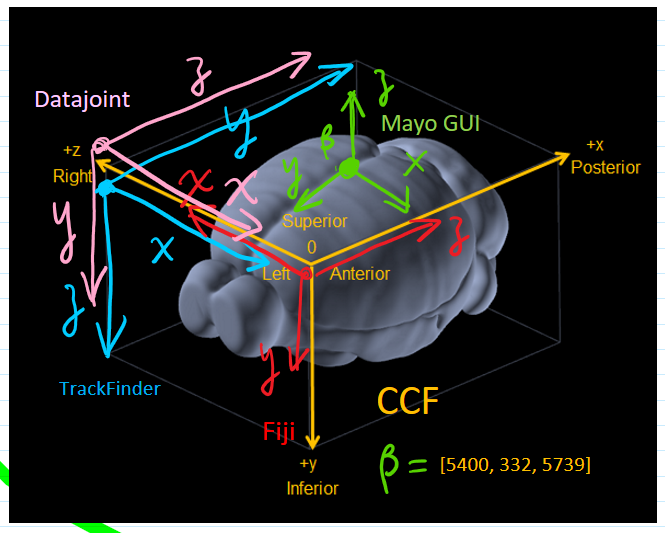

In [14]:
from IPython.display import Image
Image("./notebook/han/ccf_coord_conventions.png")

To make sure all three `hemi`s are matched

In [36]:
ephys.ProbeInsertion.fetch('probe_type')

array(['neuropixels 1.0 - 3A', 'neuropixels 1.0 - 3A',
       'neuropixels 1.0 - 3A', ..., 'neuropixels 2.0 - SS',
       'neuropixels 2.0 - SS', 'neuropixels 2.0 - SS'], dtype=object)

In [65]:
all_insertions_check_hemi = (((ephys.ProbeInsertion * experiment.Session & foraging_sessions) * ephys.ProbeInsertion.InsertionLocation * ephys.ProbeInsertion.RecordableBrainRegion
             ).proj('session_date', 'probe_type', hemi_from_note_ml='IF(ml_location < 0, "left", "right")', hemi_from_note="hemisphere")
              .aggr(histology.ElectrodeCCFPosition.ElectrodePosition, ..., hemi_from_mean_dj_ccf='IF(AVG(ccf_x) > 5739, "left", "right")')
              .proj(..., all_matched="(hemi_from_note = hemi_from_mean_dj_ccf) AND (hemi_from_note = hemi_from_note_ml)")
                            * lab.WaterRestriction.proj('water_restriction_number'))
df = pd.DataFrame(all_insertions_check_hemi.fetch()).set_index(["water_restriction_number", "subject_id", "session", "session_date", "insertion_number"]).sort_index(level=["subject_id", "session", "insertion_number"])
print(len(df))
df

50


brain_area  \
water_restriction_number subject_id session session_date insertion_number              
HH08                     473360     49      2021-08-12   1                        PL   
                                                         2                        PL   
                                    50      2021-08-13   1                        PL   
                                                         2                        PL   
                                    51      2021-08-14   1                       ALM   
                                                         2                        PL   
                                                         3                        PL   
                                    52      2021-08-15   1                        PL   
                                                         2                       ALM   
                                                         3                        PL   
                                    53      2021-08-17   1                       ACA   
                                                         2                  Striatum   
                                                         3                       ACA   
HH09                     473361     46      2021-04-16   1                        PL   
                                    47      2021-04-18   1                        PL   
                                    48      2021-04-19   1                        PL   
                                                         2                       ALM   
                                    50      2021-04-29   1                       ALM   
                                                         2                       ACA   
                                    57      2021-06-09   1                  Thalamus   
                                                         2                  Striatum   
                                    58      2021-06-11   1                  Striatum   
                                                         2                  Thalamus   
                                    59      2021-06-12   1                       RSP   
                                                         2                       RSP   
                                    60      2021-06-13   1                  Thalamus   
                                                         2                  Thalamus   
                                    61      2021-06-14   1                  Midbrain   
HH13                     482353     33      2021-11-02   1                       ACA   
                                                         2                       ALM   
                                                         3                        PL   
                                    34      2021-11-03   1                       ACA   
                                                         2                       ALM   
                                                         3                        PL   
                                    36      2021-11-05   1                       ACA   
                                                         2                       ALM   
                                                         3                        PL   
                                    37      2021-11-06   1                       ACA   
                                                         2                       ALM   
                                                         3                        PL   
                                    42      2021-11-12   1                  Thalamus   
                                                         2                  Thalamus   
                                                         3                        PL   
                                    43      2021-11-13   1                  Thalamus   
                          

Check across all MAP dataset

In [216]:
all_insertions_check_hemi = (((ephys.ProbeInsertion) * ephys.ProbeInsertion.InsertionLocation * ephys.ProbeInsertion.RecordableBrainRegion
             ).proj(hemi_from_note_ml='IF(ml_location < 0, "left", "right")', hemi_from_note="hemisphere")
              .aggr(histology.ElectrodeCCFPosition.ElectrodePosition, ..., hemi_from_mean_dj_ccf='IF(AVG(ccf_x) > 5739, "left", "right")')
              .proj(..., all_matched="(hemi_from_note = hemi_from_mean_dj_ccf) AND (hemi_from_note = hemi_from_note_ml)")
              * lab.WaterRestriction.proj('water_restriction_number'))
df_all_insertions_check_hemi = all_insertions_check_hemi.fetch(format='frame')
df_all_insertions_check_hemi.query('all_matched==0')

hemi_from_note_ml  \
subject_id session insertion_number brain_area hemi_from_note                     
2897       4       1                Medulla    right                      right   
           3       2                Medulla    left                        left   
4137       8       1                Medulla    left                        left   
432572     16      2                Medulla    right                       left   
                   1                ALM        left                       right   
           13      2                Medulla    right                       left   
                   1                ALM        left                       right   
440010     44      2                Medulla    right                       left   
                   1                ALM        left                       right   

                                                              hemi_from_mean_dj_ccf  \
subject_id session insertion_number brain_area hemi_from_note                         
2897       4       1                Medulla    right                           left   
           3       2                Medulla    left                           right   
4137       8       1                Medulla    left                           right   
432572     16      2                Medulla    right                          right   
                   1                ALM        left                            left   
           13      2                Medulla    right                          right   
                   1                ALM        left                            left   
440010     44      2                Medulla    right                          right   
                   1                ALM        left                            left   

                                                              all_matched  \
subject_id session insertion_number brain_area hemi_from_note               
2897       4       1                Medulla    right                    0   
           3       2                Medulla    left                     0   
4137       8       1                Medulla    left                     0   
432572     16      2                Medulla    right                    0   
                   1                ALM        left                     0   
           13      2                Medulla    right                    0   
                   1                ALM        left                     0   
440010     44      2                Medulla    right                    0   
                   1                ALM        left                     0   

                                                              water_restriction_number  
subject_id session insertion_number brain_area hemi_from_note                           
2897       4       1                Medulla    right                             DL004  
           3       2                Medulla    left                              DL004  
4137       8       1                Medulla    left                              DL028  
432572     16      2                Medulla    right                              dl56  
                   1                ALM        left                               dl56  
           13      2                Medulla    right                              dl56  
                   1                ALM        left                               dl56  
440010     44      2                Medulla    right                              dl62  
                   1                ALM        left                               dl62

Now HH08, HH09, HH13 are all consistent, because for all the .csv files that were ingested in `format=1`, I used `trackFinder` to flip. <br>
However, in IBL GUI, HH08 and HH09 are on the same side whereas HH13 is on the opposite side (correct in terms of our weird conventions).

# Reingest my histology data

In [258]:
(histology_ingest.HistologyIngest & foraging_sessions) * h2o

subject_id institution 6 digit animal ID,session session number,insertion_number,water_restriction_number WR number
473360,49,1,HH08
473360,49,2,HH08
473360,50,1,HH08
473360,50,2,HH08
473360,51,1,HH08
473360,51,2,HH08
473360,51,3,HH08
473360,52,1,HH08
473360,52,2,HH08
473360,52,3,HH08


Delete previous histology data

In [54]:
(histology_ingest.HistologyIngest & foraging_sessions).delete()

[2022-10-07 07:00:24,959][INFO]: Deleting 50 rows from `map_v2_ingest_histology`.`_histology_ingest__histology_file`
[2022-10-07 07:00:24,994][INFO]: Deleting 50 rows from `map_v2_ingest_histology`.`_histology_ingest__landmark_file`
[2022-10-07 07:00:25,016][INFO]: Deleting 50 rows from `map_v2_ingest_histology`.`_histology_ingest`


Commit deletes? [yes, No]:  yes


Deletes committed.


50

In [53]:
(histology.LabeledProbeTrack & foraging_sessions).delete()

[2022-10-07 07:00:17,596][INFO]: Deleting 492 rows from `map_v2_histology`.`labeled_probe_track__point`
[2022-10-07 07:00:17,619][INFO]: Deleting 50 rows from `map_v2_histology`.`labeled_probe_track`


Commit deletes? [yes, No]:  yes


Deletes committed.


50

In [52]:
(histology.ElectrodeCCFPosition & foraging_sessions).delete()

[2022-10-07 07:00:02,051][INFO]: Deleting 524 rows from `map_v2_histology`.`electrode_c_c_f_position__electrode_position_error`
[2022-10-07 07:00:02,880][INFO]: Deleting 15547 rows from `map_v2_histology`.`electrode_c_c_f_position__electrode_position`
[2022-10-07 07:00:02,906][INFO]: Deleting 50 rows from `map_v2_histology`.`electrode_c_c_f_position`


Commit deletes? [yes, No]:  yes


Deletes committed.


50

In [25]:
histology_ingest.HistologyIngest.LandmarkFile()

subject_id institution 6 digit animal ID,session session number,insertion_number,landmark_file rig file subpath
473360,49,1,Z:\ephys\HanHou\catGT\HH08\catgt_HH08_S01_20210812_g0\HH08_S01_20210812_g0_imec0\alf\landmarks_HH08_S01_20210812_imec0_xyz_picks.json
473360,49,2,Z:\ephys\HanHou\catGT\HH08\catgt_HH08_S01_20210812_g0\HH08_S01_20210812_g0_imec1\alf\landmarks_HH08_S01_20210812_imec1_xyz_picks.json
473360,50,1,Z:\ephys\HanHou\catGT\HH08\catgt_HH08_S02_20210813_g0\HH08_S02_20210813_g0_imec0\alf\landmarks_HH08_S02_20210813_imec0_xyz_picks.json
473360,50,2,Z:\ephys\HanHou\catGT\HH08\catgt_HH08_S02_20210813_g0\HH08_S02_20210813_g0_imec1\alf\landmarks_HH08_S02_20210813_imec1_xyz_picks.json
473360,51,1,Z:\ephys\HanHou\catGT\HH08\catgt_HH08_S03_20210814_g0\HH08_S03_20210814_g0_imec0\alf\landmarks_HH08_S03_20210814_imec0_xyz_picks.json
473360,51,2,Z:\ephys\HanHou\catGT\HH08\catgt_HH08_S03_20210814_g0\HH08_S03_20210814_g0_imec1\alf\landmarks_HH08_S03_20210814_imec1_xyz_picks.json
473360,52,1,Z:\ephys\HanHou\catGT\HH08\catgt_HH08_S04_20210815_g0\HH08_S04_20210815_g0_imec0\alf\landmarks_HH08_S04_20210815_imec0_xyz_picks.json
473360,52,2,Z:\ephys\HanHou\catGT\HH08\catgt_HH08_S04_20210815_g0\HH08_S04_20210815_g0_imec1\alf\landmarks_HH08_S04_20210815_imec1_xyz_picks.json
473360,52,3,Z:\ephys\HanHou\catGT\HH08\catgt_HH08_S04_20210815_g0\HH08_S04_20210815_g0_imec2\alf\landmarks_HH08_S04_20210815_imec2_xyz_picks.json
473360,53,1,Z:\ephys\HanHou\catGT\HH08\catgt_HH08_S05_20210817_g0\HH08_S05_20210817_g0_imec0\alf\landmarks_HH08_S05_20210817_imec0_xyz_picks.json


In [20]:
histology.InterpolatedShankTrack.Point & foraging_sessions

subject_id institution 6 digit animal ID,session session number,insertion_number,shank,ccf_label_id Local CCF ID,ccf_x (um),ccf_y (um),ccf_z (um)


In [21]:
(histology.InterpolatedElectrodeCCF.ElectrodePosition & foraging_sessions)

subject_id institution 6 digit animal ID,session session number,insertion_number,probe_type e.g. neuropixels_1.0,electrode_config_name user friendly name,electrode_group electrode group,"electrode electrode index, starts at 0",ccf_label_id Local CCF ID,ccf_x (um),ccf_y (um),ccf_z (um)


In [62]:
((histology.InterpolatedElectrodeCCF.ElectrodePosition & foraging_sessions) & {'subject_id':473361, 'session': 59, 'insertion_number': 2}).fetch('electrode')

array([374, 375, 376, 377, 379, 381, 383])

In [28]:
exists = (histology.ElectrodeCCFPosition.ElectrodePosition & {'subject_id':473361, 'session': 59, 'insertion_number': 2}).fetch('electrode')

In [63]:
set(range(1, 385)) - set(exists)

{378, 380, 382, 384}

In [38]:
key = ephys.ProbeInsertion &  {'subject_id':473361, 'session': 59, 'insertion_number': 2}

In [33]:
all_electrodes = (histology.ElectrodeCCFPosition & foraging_sessions).aggr(ephys.ProbeInsertion * lab.ElectrodeConfig.Electrode,
                                           elec_count='count(electrode)')
ccf_electrodes = (histology.ElectrodeCCFPosition & foraging_sessions).aggr(ephys.ProbeInsertion * histology.ElectrodeCCFPosition.ElectrodePosition,
                                                   ccf_count='count(electrode)')

In [41]:
electrode_ccf_query = (lab.ProbeType.Electrode
                       * lab.ElectrodeConfig.Electrode
                       * ephys.ProbeInsertion & key.proj()).join(
    histology.ElectrodeCCFPosition.ElectrodePosition, left=True).proj(
    'shank', 'shank_col', 'shank_row',
    x='IFNULL(ccf_x, -1)', y='IFNULL(ccf_y, -1)', z='IFNULL(ccf_z, -1)')


In [46]:
        electrode_ccf = (dj.U('electrode_group', 'electrode',
                              'shank', 'shank_col', 'shank_row', 'x', 'y', 'z')
                         & electrode_ccf_query).fetch(format='frame').reset_index()
        electrode_ccf.set_index('electrode', inplace=True)
        electrode_ccf.replace(-1, np.nan, inplace=True)

In [54]:
from scipy import interpolate
ccf_res = ccf.CCFLabel.CCF_R3_20UM_RESOLUTION  # 20um voxel size
ccf_label_id = ccf.CCFLabel.CCF_R3_20UM_ID


interp_electrodes = []
for shank in set(electrode_ccf.shank):
    for shank_col in set(electrode_ccf.shank_col):
        col_ind = electrode_ccf.query(f'shank == {shank} & shank_col == {shank_col}').index
        is_nan = electrode_ccf['x'][col_ind].isna()
        interp_electrode = electrode_ccf.loc[col_ind[is_nan]]
        for c in ('x', 'y', 'z'):
            # build interpolation function
            interp_f = interpolate.interp1d(electrode_ccf[c][col_ind][~is_nan].index,
                                            electrode_ccf[c][col_ind][~is_nan],
                                            kind='linear', fill_value='extrapolate')
            # interpolate missing data and round to CCF voxel size
            interp_coord = interp_f(electrode_ccf[c][col_ind].index)
            interp_coord = ccf_res * np.around(interp_coord / ccf_res)
            interp_electrode[c] = interp_coord[is_nan]
        interp_electrodes.append(interp_electrode)
interp_electrodes = pd.concat(interp_electrodes)

In [56]:
interp_electrodes

,electrode_group,shank,shank_col,shank_row,x,y,z
electrode,,,,,,,
378,0,1,2,189,6500.0,340.0,6440.0
380,0,1,2,190,6500.0,320.0,6440.0
382,0,1,2,191,6500.0,300.0,6440.0
384,0,1,2,192,6500.0,280.0,6440.0


In [61]:
# insert
econfig_key = (ephys.ProbeInsertion * lab.ElectrodeConfig & key.proj()).fetch1('KEY')

for _, r in interp_electrodes.iterrows():
    filled_position = {**econfig_key,
                       'electrode_group': r.electrode_group,
                       'electrode': r.name,
                       'ccf_label_id': ccf_label_id,
                       'ccf_x': r.x, 'ccf_y': r.y, 'ccf_z': r.z}
    print(filled_position)

{'subject_id': 473361, 'session': 59, 'insertion_number': 2, 'probe_type': 'neuropixels 1.0 - 3B', 'electrode_config_name': '1-384', 'electrode_group': 0.0, 'electrode': 378, 'ccf_label_id': 0, 'ccf_x': 6500.0, 'ccf_y': 340.0, 'ccf_z': 6440.0}
{'subject_id': 473361, 'session': 59, 'insertion_number': 2, 'probe_type': 'neuropixels 1.0 - 3B', 'electrode_config_name': '1-384', 'electrode_group': 0.0, 'electrode': 380, 'ccf_label_id': 0, 'ccf_x': 6500.0, 'ccf_y': 320.0, 'ccf_z': 6440.0}
{'subject_id': 473361, 'session': 59, 'insertion_number': 2, 'probe_type': 'neuropixels 1.0 - 3B', 'electrode_config_name': '1-384', 'electrode_group': 0.0, 'electrode': 382, 'ccf_label_id': 0, 'ccf_x': 6500.0, 'ccf_y': 300.0, 'ccf_z': 6440.0}
{'subject_id': 473361, 'session': 59, 'insertion_number': 2, 'probe_type': 'neuropixels 1.0 - 3B', 'electrode_config_name': '1-384', 'electrode_group': 0.0, 'electrode': 384, 'ccf_label_id': 0, 'ccf_x': 6500.0, 'ccf_y': 280.0, 'ccf_z': 6440.0}


# Plot histology

In [11]:
key = ephys.ProbeInsertion &  {'subject_id': 473360, 'session': 49, 'insertion_number': 1}

CPU times: user 1.56 s, sys: 217 ms, total: 1.77 s
Wall time: 1.48 s


{1: [array([[6534., 1744., 2588.],
         [6520., 2678., 2817.],
         [6511., 3425., 3050.],
         [6534., 4137., 3551.],
         [6523., 4676., 3891.],
         [6517., 5155., 4045.],
         [6497., 5815., 4302.]])]}

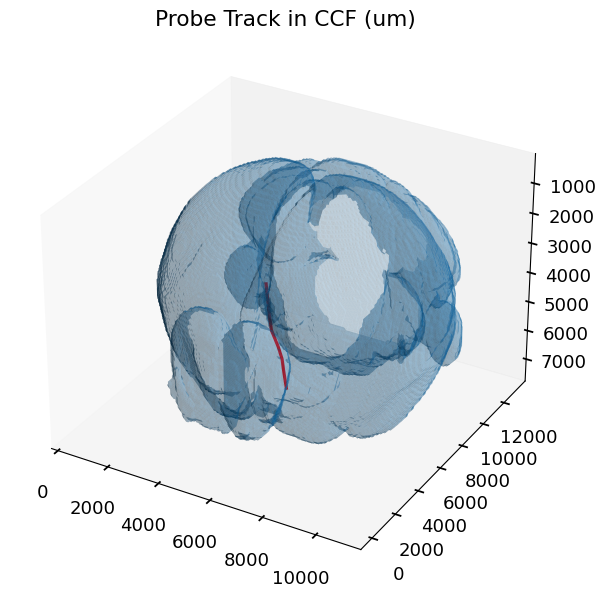

In [17]:
%%time
from pipeline.plot import histology_plot
histology_plot.plot_probe_tracks(key.proj())

In [106]:
%%time
from pipeline.plot import unit_characteristic_plot
unit_characteristic_plot.plot_pseudocoronal_slice(key)

KeyboardInterrupt: 

In [102]:
ephys.ProbeInsertion & 'subject_id=473360 AND session=49'

subject_id institution 6 digit animal ID,session session number,insertion_number,probe unique identifier for this model of probe (e.g. part number),probe_type e.g. neuropixels_1.0,electrode_config_name user friendly name
473360,49,1,18005123491,neuropixels 1.0 - 3B,1-384
473360,49,2,18005108622,neuropixels 1.0 - 3B,1-384
